## CREDIT SCORING SYSTEM USING A MACHINE LEARNING APPROACH
### Arnold Somuah Asante

.

### Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

from collections import Counter


%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import joblib

from sklearn.exceptions import ConvergenceWarning
import warnings


In [3]:
te_df = pd.read_csv('test.csv')
ta_df = pd.read_csv('train.csv')

In [4]:
ta_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [5]:
ta_df.shape

(100000, 28)

In [6]:
te_df.shape

(50000, 27)

In [7]:
te_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


## Intepretation of the Data

- ID: Unique Identification of the record
- Customer_ID: Unique Identification of the customer
- Month: Month of the paticular year
- Name: The name of the person
- Age: The age of the person
- SSN: Social Security Number of the person
- Occupation: The occupation of the person
- Annual_Income: The Annual Income of the person (Income per Year)
- Monthly_Inland_Salary: Monthly in-hand salary of the person (-taxes and squad)
- Num_Bank_Accounts: The number of bank accounts of the person
- Num_Credit_Card: Number of credit cards the person has
- Interest_Rate: The interest rate on the credit card of the person
- Num_of_Loan: The number of loans taken by the person from the bank
- Type_of_Loan: The types of loans taken by the person from the bank
- Delay_from_due_date: The average number of days delayed by the person from the date of payment
- Num_of_Delayed_Payment: Number of payments delayed by the person
- Changed_Credit_Card: The percentage change in the credit card limit of the person
- Num_Credit_Inquiries: The number of credit card inquiries by the person
- Credit_Mix: Classification of Credit Mix of the customer
- Outstanding_Debt: The outstanding balance of the person
- Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
- Credit_History_Age: The age of the credit history of the person
- Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
- Total_EMI_per_month: The total EMI per month of the person
- Amount_invested_monthly: The monthly amount invested by the person
- Payment_Behaviour: The payment behaviour of the person
- Monthly_Balance: The monthly balance left in the account of the person
- Credit_Score: The credit score of the person


<AxesSubplot:>

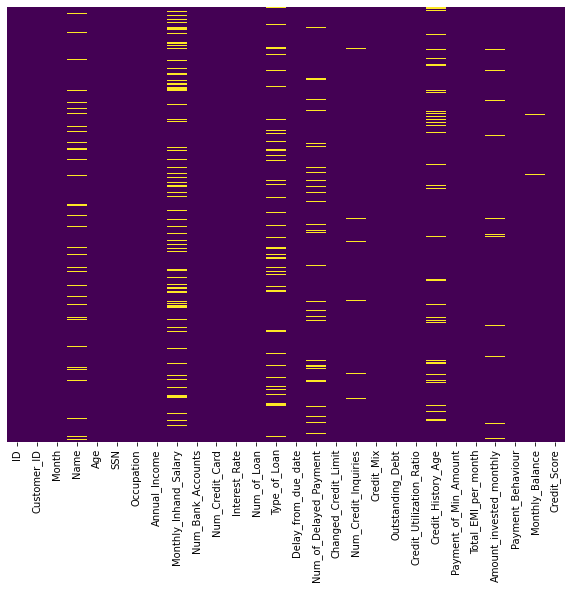

In [8]:
plt.figure(figsize = (10,8))
sb.heatmap(ta_df.isnull(),yticklabels=False, cbar= False, cmap = 'viridis')

In [9]:
ta_df.drop(['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age']
               ,axis=1,inplace=True)

ta_df.head(10)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,23,Scientist,19114.12,NaN,3,4,3,4,8,4,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,1824.843333,3,4,3,4,3,8_,...,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,23,Scientist,19114.12,1824.843333,3,4,3,4,3,6,...,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,28_,_______,34847.84,3037.986667,2,4,6,1,3,4,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986667,2,4,6,1,7,1,...,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [10]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [11]:
# Checking for the number of missing value
ta_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
#checking for the number of duplicate rows in a Pandas DataFrame 
ta_df.duplicated().sum()

0

In [13]:
# #filtering the te_df test data DataFrame by selecting  rows that have less than three missing values across all columns.

# size_pre_cleaning = te_df.shape
# te_df = te_df[te_df.isnull().sum(axis=1) < 3]

In [99]:
# # printing the number of rows that were dropped from the test_df DataFrame
# print("{} Records dropped".format(size_pre_cleaning[0] - te_df.shape[0]))

In [15]:
#Creating a function for cleaning and standardizing data that has inconsistent formatting.

def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)
print(filter_general)

<function filter_general at 0x7f7bc83b5dc0>


In [16]:
# Creating a function for cleaning and standardizing data that has inconsistent formatting but particularly for 
# the delayed payment data.

def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)


In [17]:
def neg_num(value):
    if "-" in str(value):
        return str(value).split("-")[1]
    else:
        return str(value)
    
print(neg_num)

<function neg_num at 0x7f7bc83c63a0>


In [18]:

def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [19]:
ta_df.drop(['Age'], axis =1 ,inplace = True)

In [20]:
ta_df.head(10)

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,Scientist,19114.12,NaN,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,Scientist,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,Scientist,19114.12,NaN,3,4,3,4,8,4,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,Scientist,19114.12,1824.843333,3,4,3,4,3,8_,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,Scientist,19114.12,1824.843333,3,4,3,4,3,6,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,_______,34847.84,3037.986667,2,4,6,1,3,4,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,Teacher,34847.84,3037.986667,2,4,6,1,7,1,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [21]:
ta_df["Amount_invested_monthly"]=ta_df["Amount_invested_monthly"].apply(Amount_invested_monthly)
ta_df["Amount_invested_monthly"]=ta_df["Amount_invested_monthly"].astype("float")

In [22]:
ta_df.describe(include = 'all')

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,84998.000000,100000.000000,100000.00000,100000.000000,100000,100000.000000,92998,100000,98035.000000,100000,100000,100000.000000,100000,100000.000000,95521.000000,100000,98800,100000
unique,16,18940,NaN,NaN,NaN,NaN,434,NaN,749,4384,NaN,4,13178,NaN,3,NaN,NaN,7,98792,3
top,_______,36585.12,NaN,NaN,NaN,NaN,3,NaN,19,_,NaN,Standard,1360.45,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,7062,16,NaN,NaN,NaN,NaN,14386,NaN,5327,2091,NaN,36479,24,NaN,52326,NaN,NaN,25513,9,53174
mean,NaN,NaN,4194.170850,17.091280,22.47443,72.466040,NaN,21.068780,NaN,NaN,27.754251,NaN,NaN,32.285173,NaN,1403.118217,637.412998,NaN,NaN,NaN
std,NaN,NaN,3183.686167,117.404834,129.05741,466.422621,NaN,14.860104,NaN,NaN,193.177339,NaN,NaN,5.116875,NaN,8306.041270,2043.319327,NaN,NaN,NaN
min,NaN,NaN,303.645417,-1.000000,0.00000,1.000000,NaN,-5.000000,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,1625.568229,3.000000,4.00000,8.000000,NaN,10.000000,NaN,NaN,3.000000,NaN,NaN,28.052567,NaN,30.306660,74.534002,NaN,NaN,NaN
50%,NaN,NaN,3093.745000,6.000000,5.00000,13.000000,NaN,18.000000,NaN,NaN,6.000000,NaN,NaN,32.305784,NaN,69.249473,135.925682,NaN,NaN,NaN
75%,NaN,NaN,5957.448333,7.000000,7.00000,20.000000,NaN,28.000000,NaN,NaN,9.000000,NaN,NaN,36.496663,NaN,161.224249,265.731733,NaN,NaN,NaN


In [23]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   object 
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [24]:
ta_df["Changed_Credit_Limit"]=ta_df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
ta_df.drop(ta_df[ta_df["Changed_Credit_Limit"]=="_"].index,inplace=True)
ta_df["Changed_Credit_Limit"]=ta_df["Changed_Credit_Limit"].astype("float")

In [25]:
ta_df.drop(ta_df[ta_df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    ta_df[i] = ta_df[i].apply(filter_general)
    ta_df[i] = ta_df[i].astype(np.float64)
    print(i + " Cleaned Successfully")


Annual_Income Cleaned Successfully
Num_of_Loan Cleaned Successfully
Outstanding_Debt Cleaned Successfully
Monthly_Balance Cleaned Successfully


In [26]:
ta_df['Num_of_Delayed_Payment'] = ta_df['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
ta_df['Num_of_Delayed_Payment'] = ta_df['Num_of_Delayed_Payment'].astype(np.float64)

In [27]:
ta_df['Num_of_Delayed_Payment'] = ta_df['Num_of_Delayed_Payment'].apply(neg_num)
ta_df['Num_of_Delayed_Payment'] = ta_df['Num_of_Delayed_Payment'].astype(np.float64)

In [28]:
ta_df['Delay_from_due_date'] = ta_df['Delay_from_due_date'].apply(neg_num)

In [29]:

ta_df['Occupation'] = ta_df['Occupation'].replace('_______', np.nan)
ta_df['Occupation'] = ta_df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [30]:
ta_df['Credit_Mix'] = ta_df['Credit_Mix'].replace('_', np.nan)
ta_df['Credit_Mix'] = ta_df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [31]:
ta_df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [32]:
ta_df['Payment_of_Min_Amount'] = ta_df['Payment_of_Min_Amount'].replace('NM', np.nan)
ta_df['Payment_of_Min_Amount'] = ta_df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [33]:
ta_df['Payment_Behaviour'] = ta_df['Payment_Behaviour'].replace('!@9#%8', np.nan)
ta_df['Payment_Behaviour'] = ta_df['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [34]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    ta_df[i].fillna(ta_df[i].median(), inplace=True)

In [35]:
ta_df.head(20)

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,Standard,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,Scientist,19114.12,3091.260833,3,4,3,4.0,1,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,Scientist,19114.12,3091.260833,3,4,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,Scientist,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,Scientist,19114.12,3091.260833,3,4,3,4.0,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Low_spent_Large_value_payments,340.479212,Good
6,Scientist,19114.12,1824.843333,3,4,3,4.0,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,Scientist,19114.12,1824.843333,3,4,3,4.0,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,Entrepreneur,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,Teacher,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,Teacher,34847.84,3037.986667,2,1385,6,1.0,3,1.0,5.42,2.0,Standard,605.03,33.224951,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard


In [36]:
ta_df.drop(['Num_Credit_Card'], axis= 1, inplace =True)

In [37]:
ta_df['Monthly_Balance'].fillna(ta_df['Monthly_Balance'].median(), inplace=True)

In [38]:
ta_df.head(10)

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Scientist,19114.12,1824.843333,3,3,4.0,3,7.0,11.27,4.0,Standard,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,Scientist,19114.12,3091.260833,3,3,4.0,1,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,Scientist,19114.12,3091.260833,3,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,Scientist,19114.12,1824.843333,3,3,4.0,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,Scientist,19114.12,3091.260833,3,3,4.0,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Low_spent_Large_value_payments,340.479212,Good
6,Scientist,19114.12,1824.843333,3,3,4.0,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,Scientist,19114.12,1824.843333,3,3,4.0,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,Entrepreneur,34847.84,3037.986667,2,6,1.0,3,4.0,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,Teacher,34847.84,3037.986667,2,6,1.0,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,Teacher,34847.84,3037.986667,2,6,1.0,3,1.0,5.42,2.0,Standard,605.03,33.224951,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard


In [39]:
ta_df.describe(include='all').style.set_properties(**{'font-family':'Times New Roman'})

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,97900,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900,97900.000000,97900.000000,97900.000000,97900,97900.000000,97900.000000,97900,97900.000000,97900.000000,97900,97900.000000,97900
unique,15,nan,nan,nan,nan,nan,68,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,Entrepreneur,nan,nan,nan,nan,nan,15,nan,nan,nan,Standard,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,12941,nan,nan,nan,nan,nan,3534,nan,nan,nan,55504,nan,nan,51226,nan,nan,24959,nan,52076
mean,nan,175934.197698,4026.671541,17.075863,72.271532,10.741992,nan,29.814862,10.465545,27.295996,nan,1426.613476,32.281389,nan,1406.898838,615.227515,nan,401.596439,nan
std,nan,1425711.671398,2960.795886,117.173367,466.306319,61.565651,nan,218.320622,6.670756,190.946896,nan,1155.544499,5.114578,nan,8314.901431,2000.512234,nan,212.535948,nan
min,nan,7005.930000,303.645417,-1.000000,1.000000,0.000000,nan,0.000000,0.000000,0.000000,nan,0.230000,20.000000,nan,0.000000,0.000000,nan,0.007760,nan
25%,nan,19436.305000,1790.959167,3.000000,8.000000,2.000000,nan,9.000000,5.350000,3.000000,nan,566.080000,28.049067,nan,30.338701,76.949795,nan,270.917679,nan
50%,nan,37573.920000,3091.260833,6.000000,13.000000,3.000000,nan,14.000000,9.400000,6.000000,nan,1166.370000,32.300332,nan,69.272824,135.799125,nan,336.639979,nan
75%,nan,72760.040000,5370.100000,7.000000,20.000000,6.000000,nan,18.000000,14.870000,9.000000,nan,1946.810000,36.491015,nan,161.487532,254.905860,nan,467.378940,nan


In [40]:
ta_df['Occupation'].count()

97900

In [41]:
ta_df['Occupation'].value_counts()

Entrepreneur     12941
Lawyer            6424
Architect         6241
Engineer          6208
Scientist         6172
Mechanic          6167
Accountant        6134
Developer         6111
Media_Manager     6106
Teacher           6089
Doctor            5962
Journalist        5952
Manager           5841
Musician          5792
Writer            5760
Name: Occupation, dtype: int64

In [42]:
ta_df.nunique()

Occupation                     15
Annual_Income               13463
Monthly_Inhand_Salary       13231
Num_Bank_Accounts             931
Interest_Rate                1705
Num_of_Loan                   403
Delay_from_due_date            68
Num_of_Delayed_Payment        697
Changed_Credit_Limit         3762
Num_Credit_Inquiries         1206
Credit_Mix                      3
Outstanding_Debt            12203
Credit_Utilization_Ratio    97900
Payment_of_Min_Amount           2
Total_EMI_per_month         14887
Amount_invested_monthly     89143
Payment_Behaviour               6
Monthly_Balance             96719
Credit_Score                    3
dtype: int64

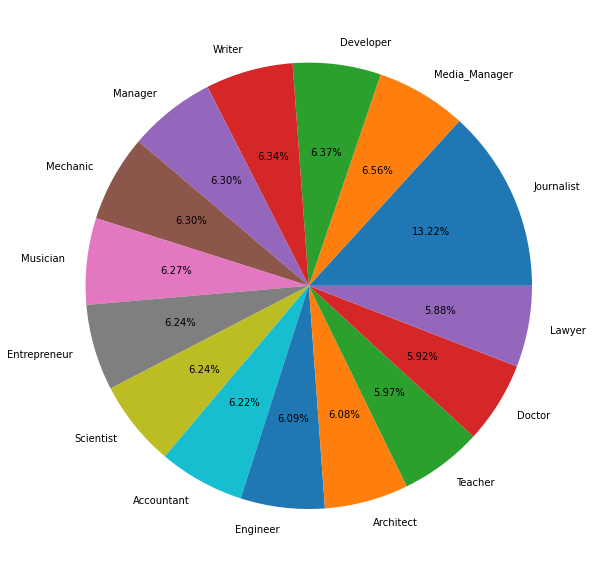

In [43]:
Occupation = ta_df['Occupation'].value_counts().tolist()
labels = ta_df['Occupation'].values.tolist()
labels = list(set(labels))
plt.figure(figsize = (10,15))
plt.pie(Occupation ,labels= labels, autopct = "%.2f%%" )
plt.show()

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

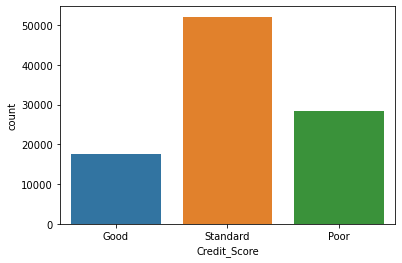

In [44]:
sb.countplot(x= 'Credit_Score', data = ta_df )

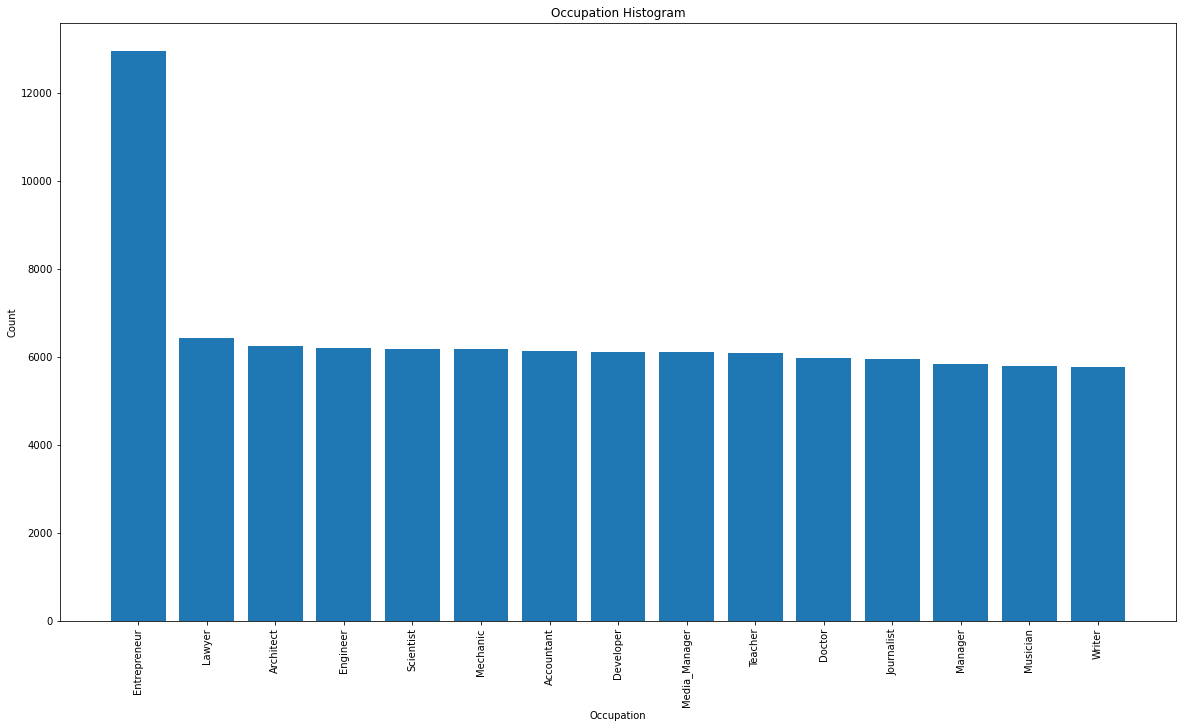

In [45]:
Occupation_counts = ta_df['Occupation'].value_counts()
fig = plt.figure(figsize= [20,11])
# create a bar chart of the occupation counts
plt.bar(Occupation_counts.index,Occupation_counts.values )

# set the title and axis labels
plt.title('Occupation Histogram')
plt.xlabel('Occupation')
plt.ylabel('Count')

# rotate the x-axis labels to make them more readable
plt.xticks(rotation=90)

# display the histogram
plt.show()

The dataset is not evenly distributed with respect to the occupation. A we can see that most of the

array([[<AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>],
       [<AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>],
       [<AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>],
       [<AxesSubplot:title={'center':'Monthly_Balance'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

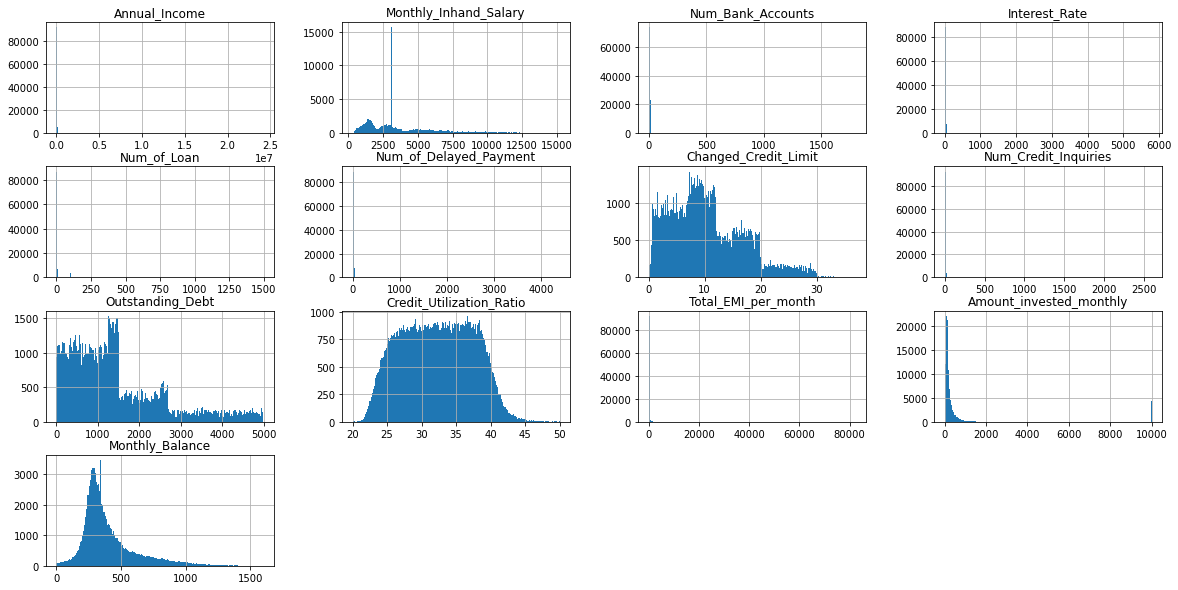

In [46]:
ta_df.hist(bins=200,figsize=[20,10])

In [47]:
def pie_plot(ta_df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        ta_df[col].value_counts().plot(ax=ax, kind='pie', figsize=(20, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()
    

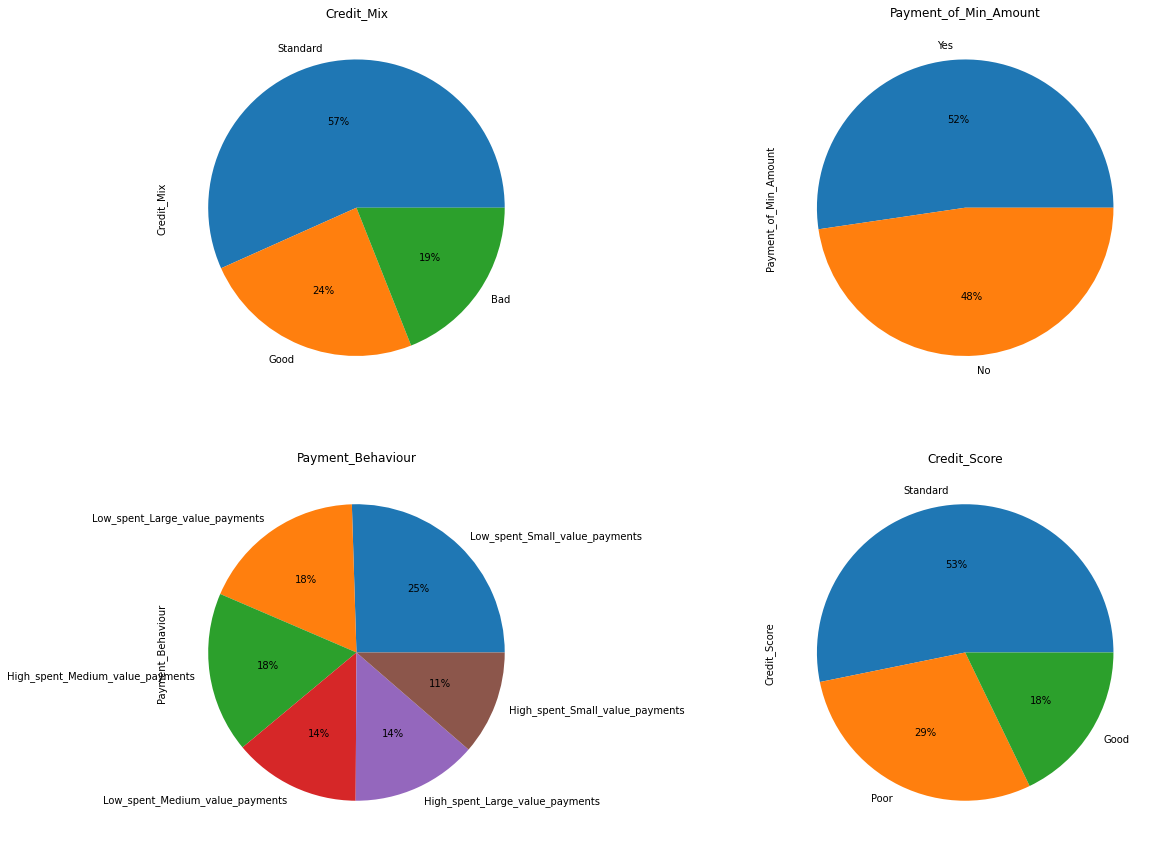

In [48]:
pie_plot(ta_df, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

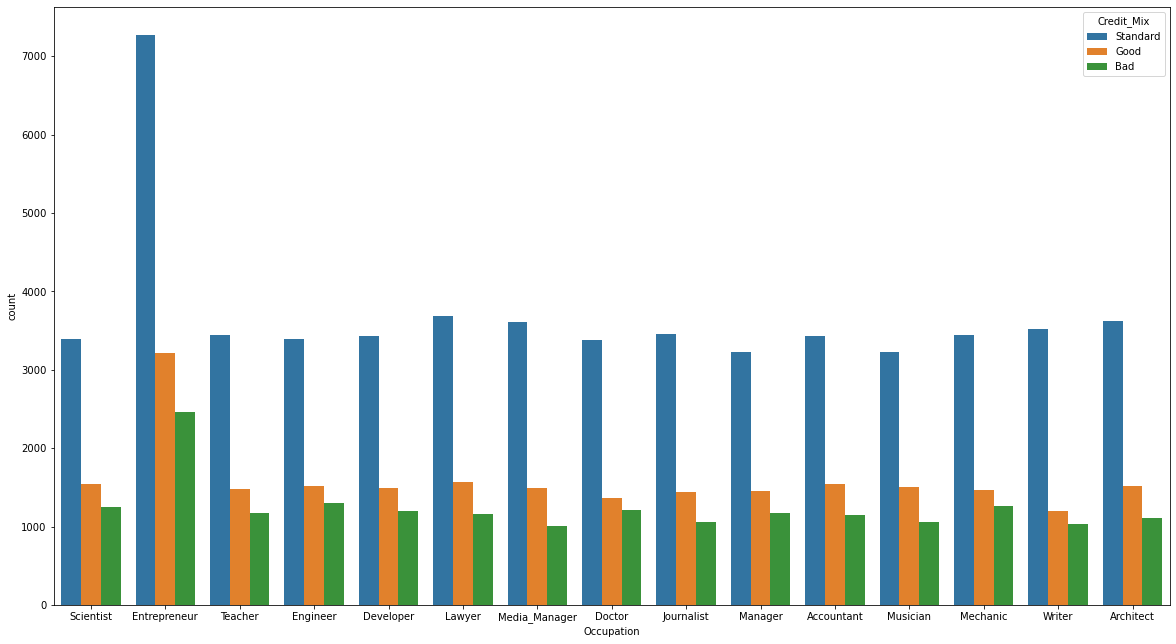

In [49]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=ta_df,x="Occupation",hue="Credit_Mix")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

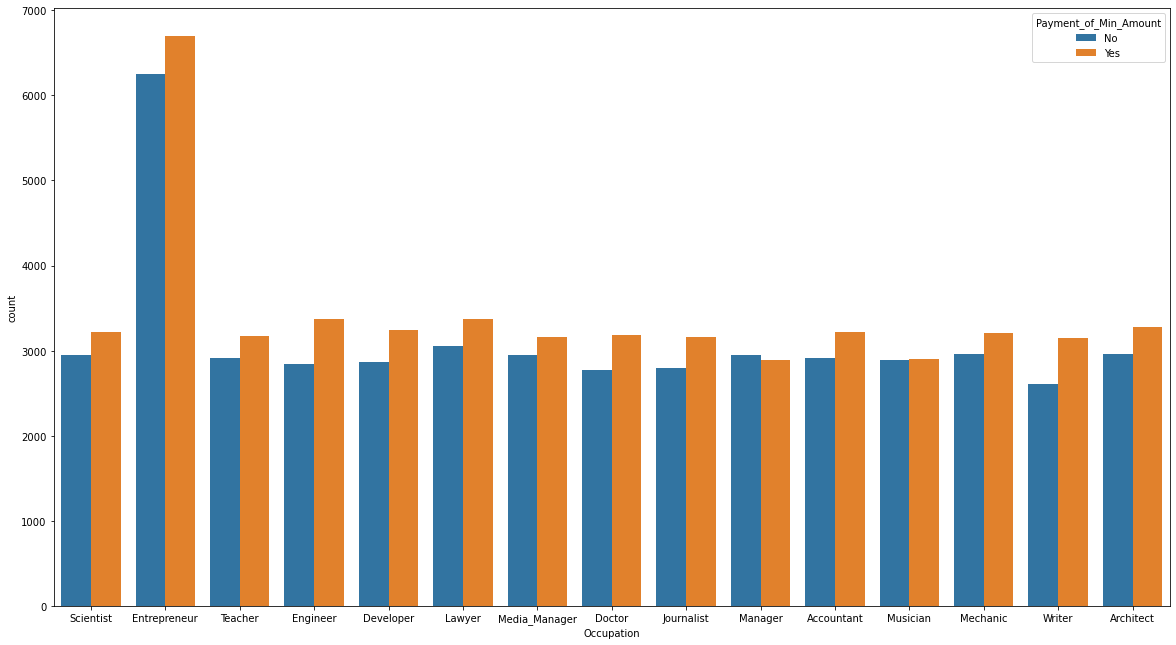

In [50]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=ta_df,x="Occupation",hue="Payment_of_Min_Amount")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

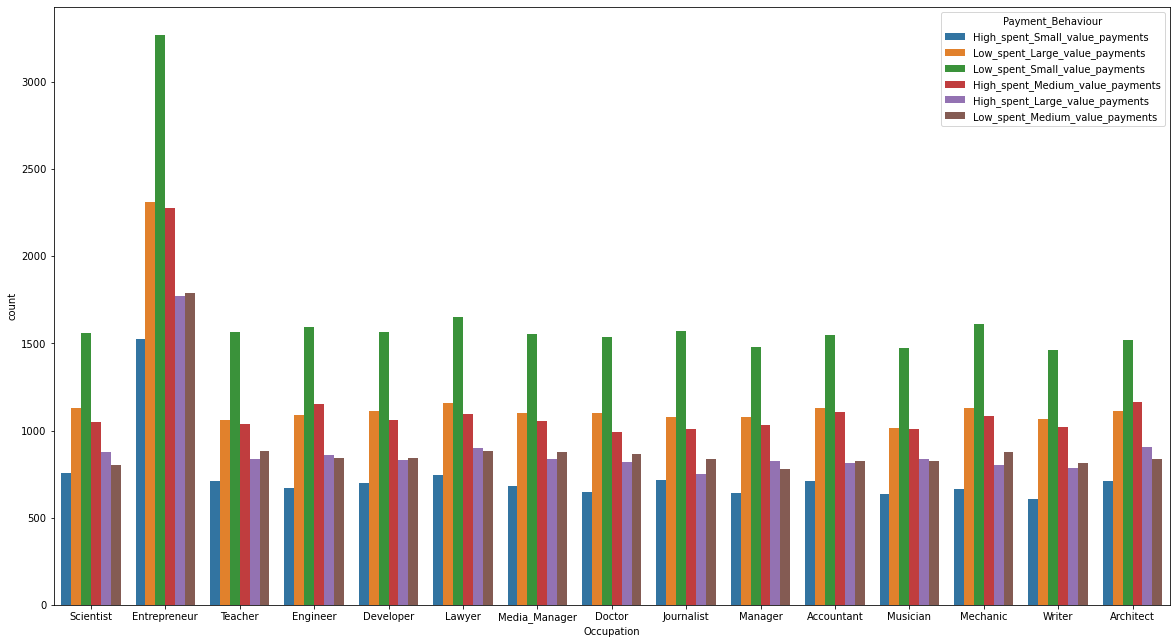

In [51]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=ta_df,x="Occupation",hue="Payment_Behaviour")

In [52]:
numeric_cols = ta_df.select_dtypes(exclude = "object").columns
cat_cols = te_df.select_dtypes(include = "object").columns
numeric_cols

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [53]:
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif_df = ta_df[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Annual_Income,1.016129
1,Monthly_Inhand_Salary,4.744109
2,Num_Bank_Accounts,1.021188
3,Interest_Rate,1.023759
4,Num_of_Loan,1.030459
5,Num_of_Delayed_Payment,1.018613
6,Changed_Credit_Limit,4.270681
7,Num_Credit_Inquiries,1.020403
8,Outstanding_Debt,3.350254
9,Credit_Utilization_Ratio,9.676983


<AxesSubplot:>

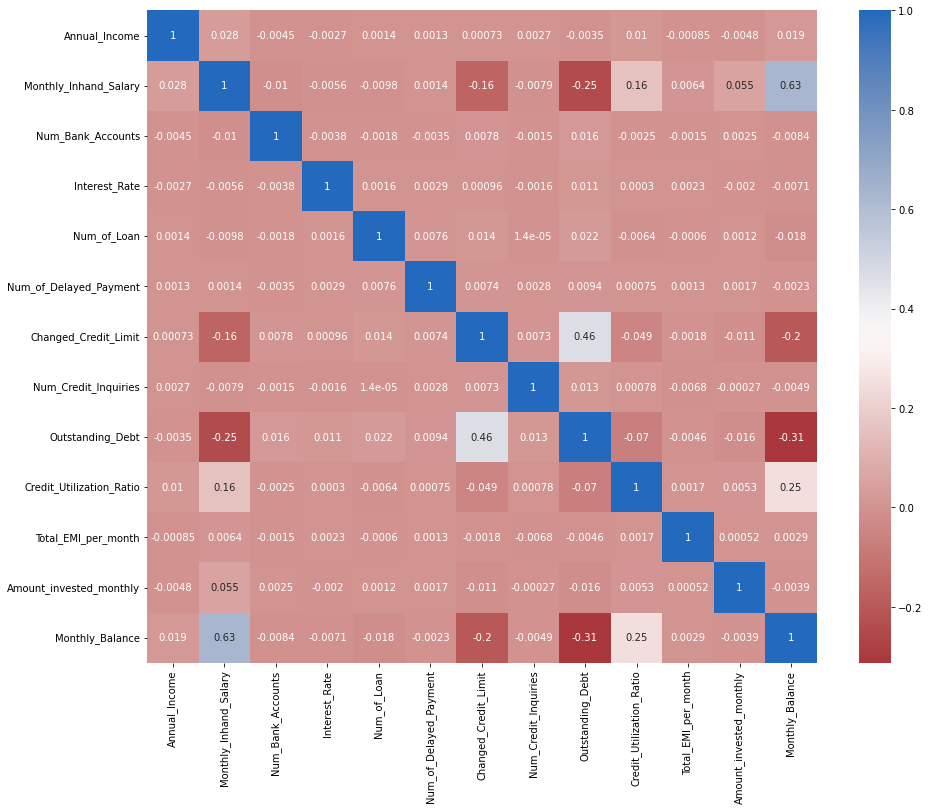

In [56]:
plt.figure(figsize= (15,12))
sb.heatmap(ta_df[numeric_cols].corr(),annot=True ,cmap = 'vlag_r')

In [57]:
def box_plot(ta_df, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sb.boxplot(ta_df[l], palette="Accent")

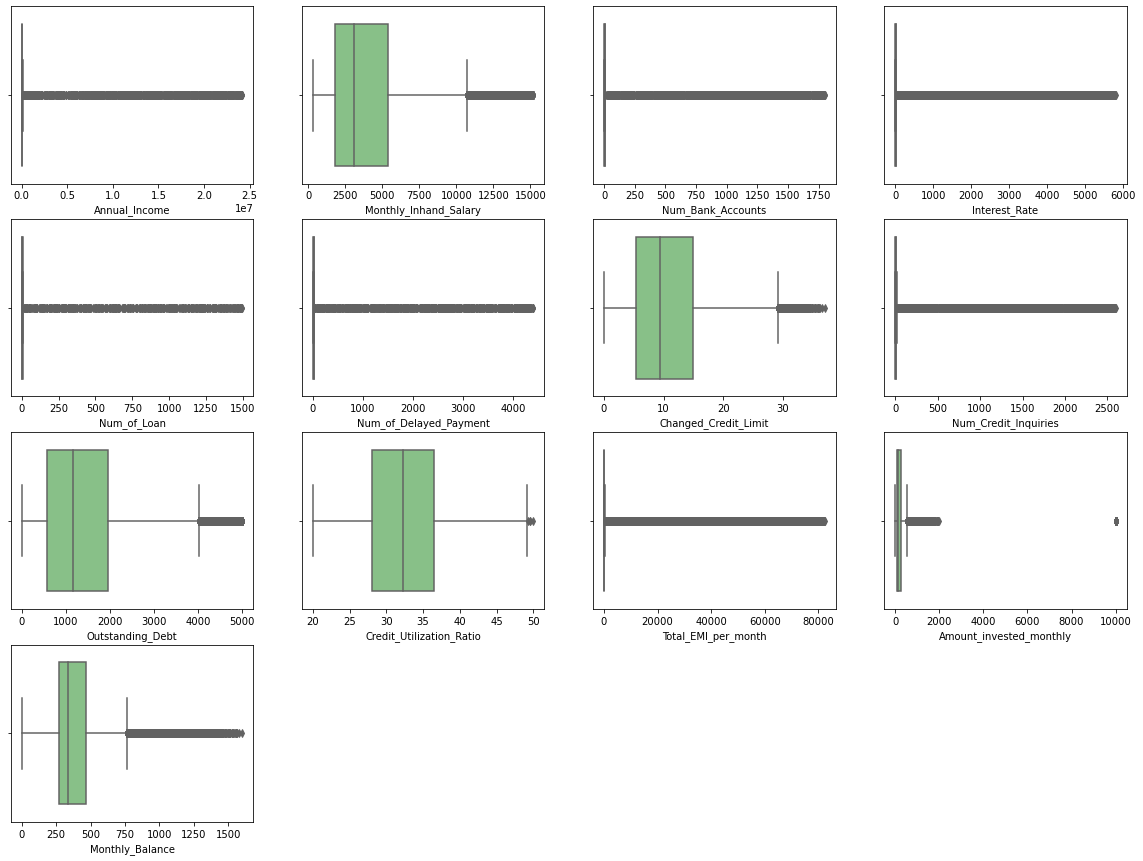

In [58]:
box_plot(ta_df, numeric_cols)

In [59]:
#def RobustScaling(df_num, cols):
    #scaler = preprocessing.RobustScaler()
    #robust_df_temp = scaler.fit_transform(df_num)
    #robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    #return robust_df_temp

def RobustScaling(df_num, cols,decimals=2):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    #robust_df_temp = pd.DataFrame(abs(robust_df_temp), columns =cols)
    robust_df_temp = robust_df_temp.round(decimals)
    return robust_df_temp


In [60]:
ta_df[numeric_cols] = RobustScaling(ta_df[numeric_cols], numeric_cols)
ta_df

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Scientist,-0.35,-0.35,-0.75,-0.83,0.25,3,-0.78,0.20,-0.33,Standard,-0.26,-0.65,No,-0.15,-0.31,High_spent_Small_value_payments,-0.12,Good
1,Scientist,-0.35,0.00,-0.75,-0.83,0.25,1,0.00,0.20,-0.33,Good,-0.26,-0.04,No,-0.15,-0.10,Low_spent_Large_value_payments,-0.26,Good
3,Scientist,-0.35,0.00,-0.75,-0.83,0.25,5,-1.11,-0.33,-0.33,Good,-0.26,-0.11,No,-0.15,0.36,Low_spent_Small_value_payments,-0.58,Good
4,Scientist,-0.35,-0.35,-0.75,-0.83,0.25,6,0.00,0.20,-0.33,Good,-0.26,-0.89,No,-0.15,-0.53,High_spent_Medium_value_payments,0.02,Good
5,Scientist,-0.35,0.00,-0.75,-0.83,0.25,8,-1.11,-0.01,-0.33,Good,-0.26,-0.60,No,-0.15,-0.41,Low_spent_Large_value_payments,0.02,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Mechanic,0.04,0.07,-0.50,-0.50,-0.25,23,-0.78,0.22,-0.50,Standard,-0.48,0.28,No,-0.26,-0.42,High_spent_Large_value_payments,0.73,Poor
99996,Mechanic,0.04,0.07,-0.50,-0.50,-0.25,18,-0.78,0.22,-0.50,Standard,-0.48,0.98,No,-0.26,-0.46,High_spent_Medium_value_payments,0.81,Poor
99997,Mechanic,0.04,0.07,-0.50,476.33,-0.25,27,-0.89,0.22,-0.50,Good,-0.48,1.06,No,-0.26,-0.63,High_spent_Large_value_payments,0.92,Poor
99998,Mechanic,0.04,0.07,-0.50,-0.50,-0.25,20,0.00,0.22,-0.50,Good,-0.48,0.16,No,-0.26,0.65,Low_spent_Large_value_payments,-0.09,Standard


In [61]:
#ta_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
#ta_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
#ta_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)

# Check if the columns 'Occupation' and 'Payment_Behaviour' are present in ta_df
#if 'Occupation' in ta_df.columns and 'Payment_Behaviour' in ta_df.columns:
    #ta_df = pd.get_dummies(ta_df, columns = ['Occupation', 'Payment_Behaviour'])


#ta_df

# Define mapping dictionaries for column value replacements
credit_score_map = {"Poor": 0, "Standard": 1, "Good": 2}
credit_mix_map = {"Bad": 0, "Standard": 1, "Good": 2}
payment_min_amount_map = {"Yes": 1, "No": 0}

# Replace column values using map method instead of multiple replace() calls
ta_df['Credit_Score'] = ta_df['Credit_Score'].map(credit_score_map)
ta_df['Credit_Mix'] = ta_df['Credit_Mix'].map(credit_mix_map)
ta_df['Payment_of_Min_Amount'] = ta_df['Payment_of_Min_Amount'].map(payment_min_amount_map)

# Check if 'Occupation' and 'Payment_Behaviour' columns exist in ta_df
if 'Occupation' in ta_df.columns and 'Payment_Behaviour' in ta_df.columns:
    ta_df = pd.get_dummies(ta_df, columns=['Occupation', 'Payment_Behaviour'])

ta_df.describe(include = 'all')


,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900,97900.000000,97900.000000,97900.000000,97900.000000,...,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000
unique,NaN,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3534,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.594779,0.261364,2.768966,4.939267,1.935498,NaN,1.757282,0.111901,3.549527,1.053279,...,0.059162,0.063044,0.062196,0.058836,0.137263,0.175087,0.113585,0.180521,0.138601,0.254944
std,26.736899,0.827246,29.293342,38.858870,15.391413,NaN,24.257846,0.700718,31.824457,0.655911,...,0.235930,0.243043,0.241513,0.235318,0.344126,0.380043,0.317309,0.384623,0.345531,0.435832
min,-0.570000,-0.780000,-1.750000,-1.000000,-0.750000,NaN,-1.560000,-0.990000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.340000,-0.360000,-0.750000,-0.420000,-0.250000,NaN,-0.560000,-0.430000,-0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.660000,0.640000,0.250000,0.580000,0.750000,NaN,0.440000,0.570000,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [62]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97900 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Annual_Income                                       97900 non-null  float64
 1   Monthly_Inhand_Salary                               97900 non-null  float64
 2   Num_Bank_Accounts                                   97900 non-null  float64
 3   Interest_Rate                                       97900 non-null  float64
 4   Num_of_Loan                                         97900 non-null  float64
 5   Delay_from_due_date                                 97900 non-null  object 
 6   Num_of_Delayed_Payment                              97900 non-null  float64
 7   Changed_Credit_Limit                                97900 non-null  float64
 8   Num_Credit_Inquiries                                97900 non-null  float64


In [63]:
ta_df.head(15)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.35,-0.35,-0.75,-0.83,0.25,3,-0.78,0.20,-0.33,1,...,0,1,0,0,0,0,1,0,0,0
1,-0.35,0.00,-0.75,-0.83,0.25,1,0.00,0.20,-0.33,2,...,0,1,0,0,0,0,0,1,0,0
3,-0.35,0.00,-0.75,-0.83,0.25,5,-1.11,-0.33,-0.33,2,...,0,1,0,0,0,0,0,0,0,1
4,-0.35,-0.35,-0.75,-0.83,0.25,6,0.00,0.20,-0.33,2,...,0,1,0,0,0,1,0,0,0,0
5,-0.35,0.00,-0.75,-0.83,0.25,8,-1.11,-0.01,-0.33,2,...,0,1,0,0,0,0,0,1,0,0
6,-0.35,-0.35,-0.75,-0.83,0.25,3,-0.67,0.20,-0.33,2,...,0,1,0,0,0,0,0,0,0,1
7,-0.35,-0.35,-0.75,-0.83,0.25,3,-0.89,0.20,-0.33,2,...,0,1,0,0,0,1,0,0,0,0
8,-0.05,-0.01,-1.00,-0.58,-0.50,3,-1.11,-0.42,-0.67,2,...,0,0,0,0,0,0,0,0,0,1
9,-0.05,-0.01,-1.00,-0.58,-0.50,7,-1.44,-0.21,-0.67,2,...,0,0,1,0,1,0,0,0,0,0
10,-0.05,-0.01,-1.00,-0.58,-0.50,3,-1.44,-0.42,-0.67,1,...,0,0,1,0,1,0,0,0,0,0


In [64]:
for i in numeric_cols:
    ta_df[i].fillna(method='ffill', inplace=True)


In [65]:
X = ta_df.drop(['Credit_Score'],axis=1)

y = (ta_df['Credit_Score'])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [67]:
lr = LogisticRegression(n_jobs=-1,random_state=1)

In [68]:
lr.fit(X_train, y_train)

/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=1)

In [69]:
# Evaluate the performance of the model on the test data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Data:", accuracy)


Accuracy on Test Data: 0.6085368495991581


In [70]:
#Define a Random Forest Classifier model with parallel processing and a fixed random state
clf_rf = RandomForestClassifier(n_jobs=-1, random_state=1)

#Define a parameter grid to search for the best hyperparameters using Grid Search Cross-Validation
parametrs = {"n_estimators": [5, 10, 20, 30], 'max_depth': range(1, 10)}

#Create a GridSearchCV object with the defined model, parameter grid, and 5-fold cross-validation
clf_rf_grid = GridSearchCV(clf_rf, parametrs, cv=5)

#Fit the GridSearchCV object to the training data
clf_rf_grid.fit(X_train, y_train)
#Store the best estimator model found by the GridSearchCV object
rf_best = clf_rf_grid.best_estimator_
#Evaluate the accuracy of the best estimator model on the test data
accuracy = rf_best.score(X_test, y_test)
accuracy

0.6942458290772897

In [71]:

# Define the hyperparameter grid for decision tree
param_grid = {'max_depth': range(1, 11)}

# Create and fit the decision tree model with grid search cross-validation
dt = DecisionTreeClassifier(random_state=1)
dt_grid = GridSearchCV(dt, param_grid, cv=5)
dt_grid.fit(X_train, y_train)

# Retrieve the best estimator
dt_best = dt_grid.best_estimator_

# Evaluate the performance of the best estimator on the test data
y_pred = dt_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Estimator:", dt_best)
print("Accuracy on Test Data:", accuracy)



Best Estimator: DecisionTreeClassifier(max_depth=9, random_state=1)
Accuracy on Test Data: 0.695422044758102


In [72]:

# Create and fit the Naive Bayes Classifier model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Retrieve the best estimator (not applicable for Naive Bayes as it does not have hyperparameters)

# Evaluate the performance of the model on the test data
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Data:", accuracy)




Accuracy on Test Data: 0.5762218714210543


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.42      0.51      9353
           1       0.62      0.77      0.69     17171
           2       0.52      0.43      0.47      5783

    accuracy                           0.61     32307
   macro avg       0.59      0.54      0.56     32307
weighted avg       0.61      0.61      0.60     32307



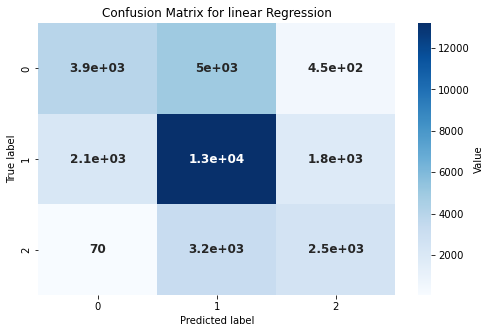

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the classes of the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy on Test Data:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



plt.figure(figsize = (8,5))
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ax = sb.heatmap(cm, annot=True, cmap="Blues",fmt='.2g', annot_kws={'fontsize':12, 'fontweight':'bold'}, cbar_kws={'label': 'Value'})

                                     
plt.title("Confusion Matrix for linear Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()




Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      9353
           1       0.75      0.72      0.73     17171
           2       0.54      0.68      0.60      5783

    accuracy                           0.69     32307
   macro avg       0.67      0.69      0.67     32307
weighted avg       0.70      0.69      0.70     32307



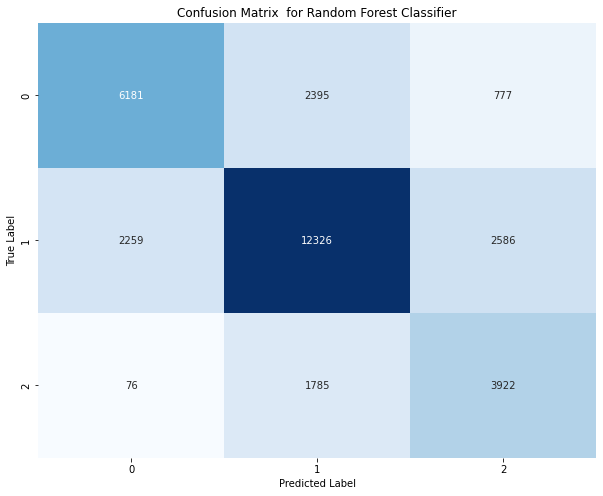

In [74]:


# Evaluate the model on the test set
y_pred = rf_best.predict(X_test)
y_pred_proba = rf_best.predict_proba(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sb.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix  for Random Forest Classifier")
plt.show()




              precision    recall  f1-score   support

           0       0.57      0.61      0.59      9353
           1       0.72      0.49      0.58     17171
           2       0.42      0.79      0.55      5783

    accuracy                           0.58     32307
   macro avg       0.57      0.63      0.57     32307
weighted avg       0.62      0.58      0.58     32307



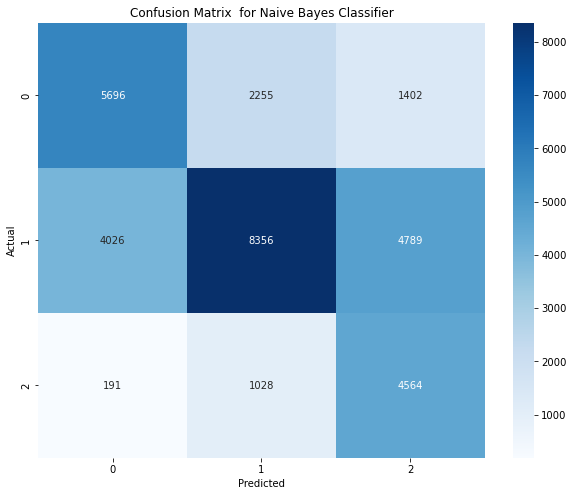

In [75]:
# Make predictions on test data
y_pred = gnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix  for Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      9353
           1       0.75      0.72      0.74     17171
           2       0.54      0.70      0.61      5783

    accuracy                           0.70     32307
   macro avg       0.67      0.69      0.68     32307
weighted avg       0.71      0.70      0.70     32307



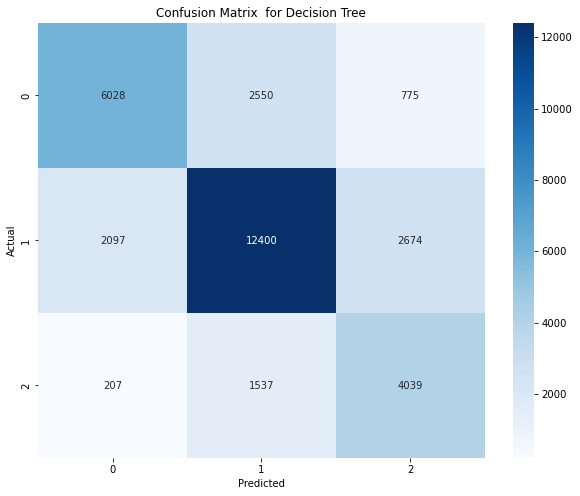

In [76]:
# Make predictions on test data
y_pred = dt_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix  for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

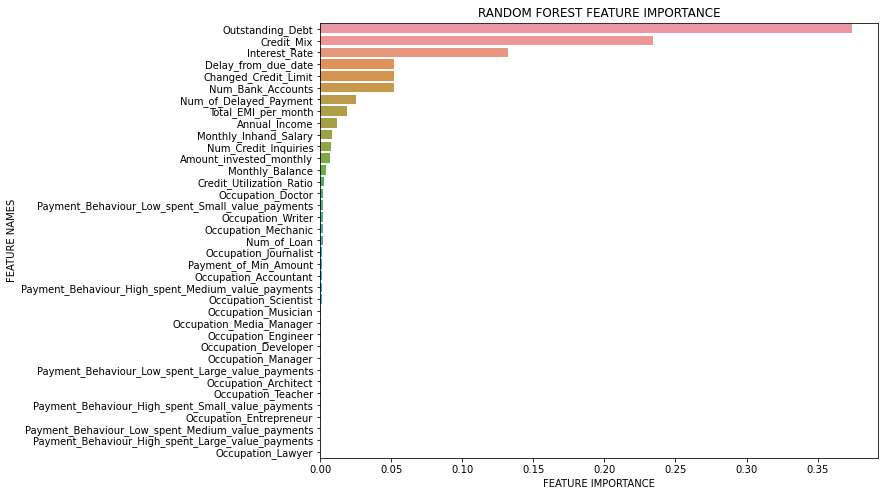

In [77]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #fi_df = pd.DataFrame(ta_df)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sb.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(dt_best.feature_importances_,X.columns,'RANDOM FOREST')





In [78]:
# import joblib



# # Save the trained model to a file
# joblib.dump(rf_best, 'credit_scoring_model.joblib')

In [79]:
# model = joblib.load('credit_scoring_model.joblib')


In [80]:

# Make predictions
#X_test = te_df.drop('Credit_Mix', axis=1)
# Convert categorical features to one-hot encoded features
#1X_test = pd.get_dummies(X_test)
#y5_test = te_df['Credit_Mix']

In [81]:
#y_uipred = model.predict(X_test)

In [82]:
#accuracy = accuracy_score(y_test, y_pred)
#accuracy


In [83]:
#precision = precision_score(y_test, y_pred)
#precision

In [84]:
#recall = recall_score(y_test, y_pred)
#recall

In [85]:
#f1 = f1_score(y_test, y_pred)
#f1

In [86]:
te_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [87]:
te_df = te_df.dropna().copy()

In [89]:
#Drop the column which is out of model scope
te_df_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_test = te_df.drop(te_df_col , axis=1).copy()
drop_test

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.574949,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.574949,High_spent_Medium_value_payments,361.44400385378196
4,28,_______,34847.84,3,1,605.03,27 Years and 3 Months,No,18.816215,High_spent_Large_value_payments,485.2984336755923
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816215,Low_spent_Large_value_payments,303.3550833433617
7,28,Teacher,34847.84,3,2_,605.03,27 Years and 6 Months,No,18.816215,!@9#%8,421.44796447960783
...,...,...,...,...,...,...,...,...,...,...,...
49992,29,Architect,20002.88,33,25,3571.7,6 Years and 4 Months,Yes,60.964772,Low_spent_Small_value_payments,314.8151526456419
49993,29,Architect,20002.88,33,25,3571.7,6 Years and 5 Months,Yes,60.964772,Low_spent_Small_value_payments,350.23147346441687
49994,29,_______,20002.88,33,22,3571.7,6 Years and 6 Months,Yes,60.964772,High_spent_Small_value_payments,341.179047488264
49997,25,Mechanic,39628.99,23,5,502.38,32 Years and 0 Months,No,35.104023,Low_spent_Large_value_payments,349.7263321025098


In [90]:
drop_test = drop_test[drop_test['Occupation'].str.contains('_______') == False]
drop_test = drop_test[drop_test['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [91]:
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount']
for i in col_int:
  for c in sym:
    drop_test[i] = drop_test[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_test[i] = drop_test[i].replace(c,'')
drop_test.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.57494921489417,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.57494921489417,High_spent_Medium_value_payments,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816214573128885,Low_spent_Large_value_payments,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18 Years and 6 Months,No,246.9923194537421,Low_spent_Large_value_payments,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17 Years and 11 Months,No,16.415451659824875,High_spent_Medium_value_payments,425.7266258262577


In [92]:
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace('Months','')

In [93]:
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_test.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22.9,No,49.57494921489417,1,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22.10,No,49.57494921489417,5,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27.4,No,18.816214573128885,3,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18.6,No,246.9923194537421,3,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17.11,No,16.415451659824875,5,425.7266258262577


In [94]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_test[i] = drop_test[i].astype(float)
drop_test.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
dtype: object

In [95]:
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('No', '2')
drop_test['Payment_of_Min_Amount'] = drop_test[['Payment_of_Min_Amount']].apply(pd.to_numeric)

In [96]:
drop_test = pd.get_dummies(drop_test, prefix='Occupation', columns=['Occupation'], drop_first=False)
drop_test.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,0,0,0,0,0,0,0,1,0,0
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,0,0,0,0,0,0,0,1,0,0
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,0,0,0,0,0,0,0,0,1,0
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,0,0,0,0,0,0,0,0,0,0
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,1,0,0,0,0,0,0,0,0,0


In [98]:
Credit_Score = dt_best.predict(drop_test)
drop_test['Credit_Score'] = Credit_Score
drop_test

ValueError: X has 25 features, but DecisionTreeClassifier is expecting 37 features as input.